In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from scipy.integrate import solve_ivp
from scipy import optimize
import seaborn as sns
from shelllock import PyCCELL_PRFQT as px

In [2]:
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (8,5)
sns.set_palette("colorblind")
path= '../images/SHERLOCK/'

In [3]:
def endpoint(df):
    end_point = pd.DataFrame(df.max(axis=0))
    end_point = end_point.T
    end_point= end_point.drop(columns=[i for i in end_point.columns if 'Time'in i or'NC'in i or'std' in i])
    return end_point

In [4]:
targets = px.mainf('../results/SHERLOCK/all_targets/220920_sherlock.xlsx'
               ,70,"YES",'line',['G8','G9','G10'])


targets.columns

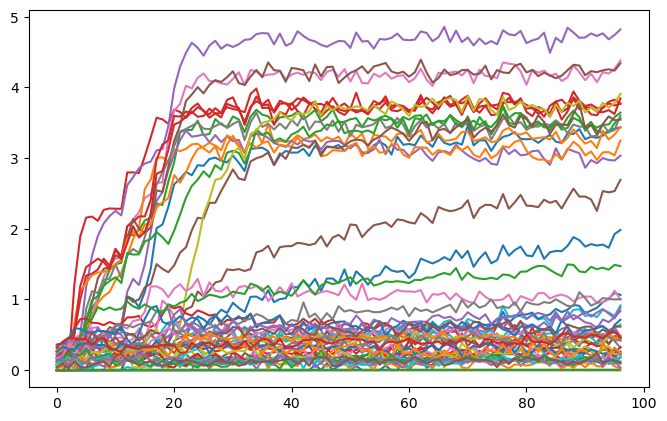

In [44]:
for i in targets.columns:
    if i != 'Time':
        targets[i].plot()

## Rename all the columns using the text file containing the well plan

In [5]:
name = pd.read_csv('../results/SHERLOCK/all_targets/plan_de_plaque_2.txt',sep = "\t", header=None)
names = list(name[2].values)
sd = [x +"_sd" for x in names]

names.extend(['Time'])
names.extend(sd)
print(names)

['PositiveC', 'ToxRm10', '100nM_Trigopus', 'SD', 'Synthetic DNA', '10nM_Trigopus', 'IL17', 'Synthetic DNA full', '1nM_Trigopus', '16s03', '40s', '100µM_ToxR', '16s04', 'EF1a', 'DnaJ07', 'Tigriopus', 'NC ', 'DnaJ09', '60s', 'DnaJ10', 'flaA', 'ToxR', '100nM_ToxR', 'ToxRm1', '10nM_ToxR', 'ToxRm2', '1nM_ToxR', 'ToxRm4', '100nM_DnaJ07', 'ToxRm6', '10nM_DnaJ07', 'ToxRm8', '1nM_DnaJ07', 'Time', 'PositiveC_sd', 'ToxRm10_sd', '100nM_Trigopus_sd', 'SD_sd', 'Synthetic DNA_sd', '10nM_Trigopus_sd', 'IL17_sd', 'Synthetic DNA full_sd', '1nM_Trigopus_sd', '16s03_sd', '40s_sd', '100µM_ToxR_sd', '16s04_sd', 'EF1a_sd', 'DnaJ07_sd', 'Tigriopus_sd', 'NC _sd', 'DnaJ09_sd', '60s_sd', 'DnaJ10_sd', 'flaA_sd', 'ToxR_sd', '100nM_ToxR_sd', 'ToxRm1_sd', '10nM_ToxR_sd', 'ToxRm2_sd', '1nM_ToxR_sd', 'ToxRm4_sd', '100nM_DnaJ07_sd', 'ToxRm6_sd', '10nM_DnaJ07_sd', 'ToxRm8_sd', '1nM_DnaJ07_sd']


In [6]:
for i in range(len(targets.columns)):
    targets.rename(columns={targets.columns[i]:names[i]},inplace=True)
    
targets.columns

Index(['PositiveC', 'ToxRm10', '100nM_Trigopus', 'SD', 'Synthetic DNA',
       '10nM_Trigopus', 'IL17', 'Synthetic DNA full', '1nM_Trigopus', '16s03',
       '40s', '100µM_ToxR', '16s04', 'EF1a', 'DnaJ07', 'Tigriopus', 'NC ',
       'DnaJ09', '60s', 'DnaJ10', 'flaA', 'ToxR', '100nM_ToxR', 'ToxRm1',
       '10nM_ToxR', 'ToxRm2', '1nM_ToxR', 'ToxRm4', '100nM_DnaJ07', 'ToxRm6',
       '10nM_DnaJ07', 'ToxRm8', '1nM_DnaJ07', 'Time', 'PositiveC_sd',
       'ToxRm10_sd', '100nM_Trigopus_sd', 'SD_sd', 'Synthetic DNA_sd',
       '10nM_Trigopus_sd', 'IL17_sd', 'Synthetic DNA full_sd',
       '1nM_Trigopus_sd', '16s03_sd', '40s_sd', '100µM_ToxR_sd', '16s04_sd',
       'EF1a_sd', 'DnaJ07_sd', 'Tigriopus_sd', 'NC _sd', 'DnaJ09_sd', '60s_sd',
       'DnaJ10_sd', 'flaA_sd', 'ToxR_sd', '100nM_ToxR_sd', 'ToxRm1_sd',
       '10nM_ToxR_sd', 'ToxRm2_sd', '1nM_ToxR_sd', 'ToxRm4_sd',
       '100nM_DnaJ07_sd', 'ToxRm6_sd', '10nM_DnaJ07_sd', 'ToxRm8_sd',
       '1nM_DnaJ07_sd'],
      dtype='object')

targets.to_csv('../images/SHERLOCK/modeling/alltargets.csv')

# Plotting

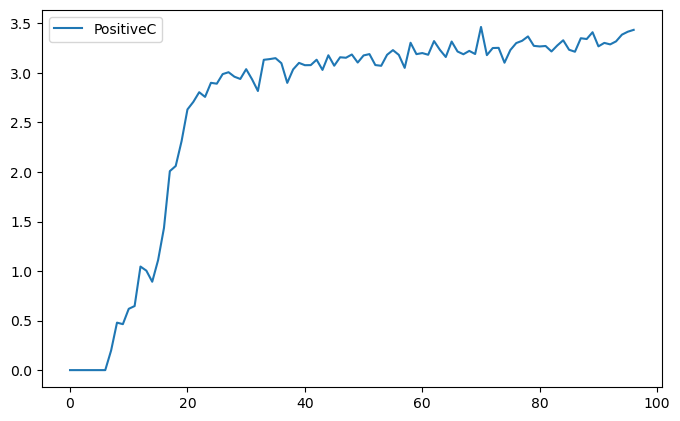

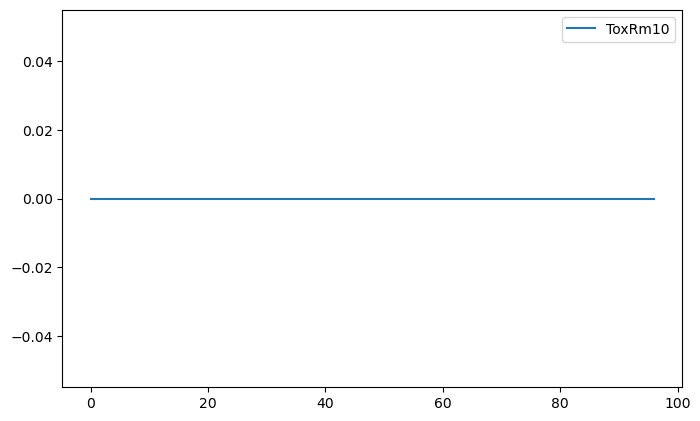

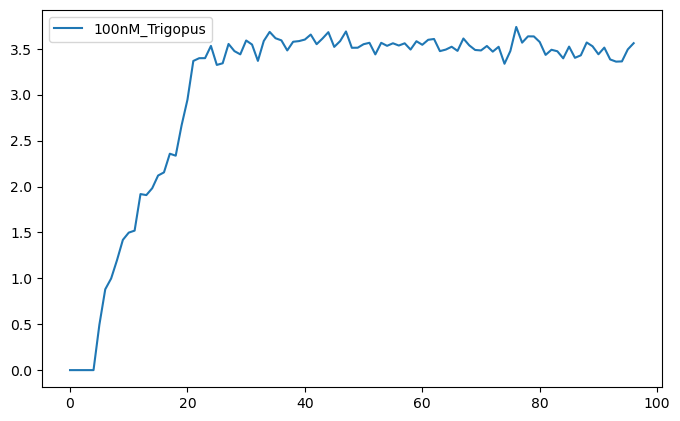

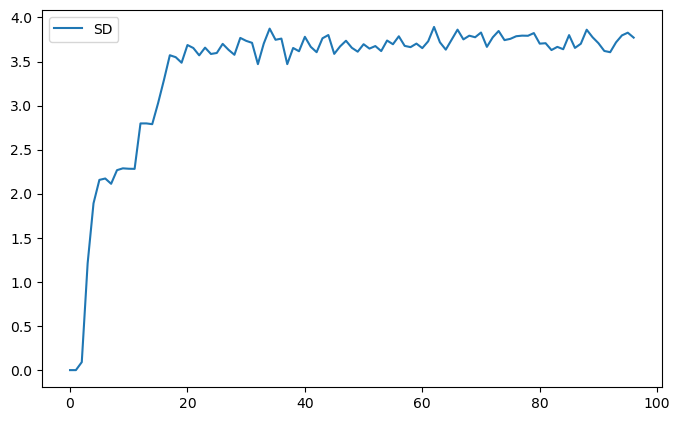

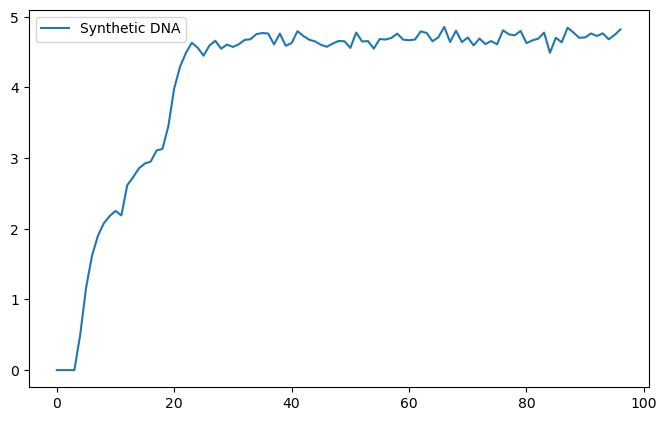

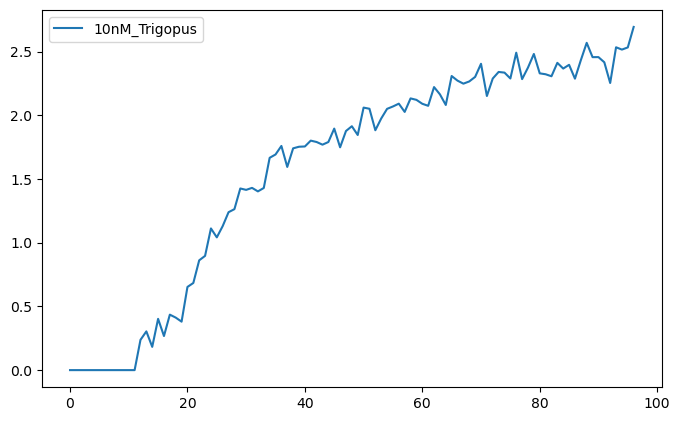

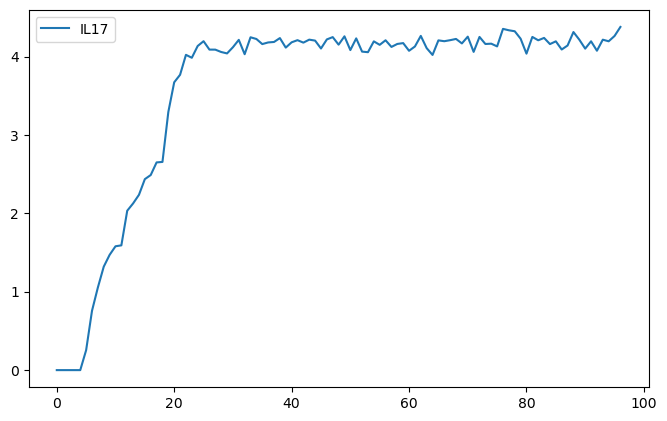

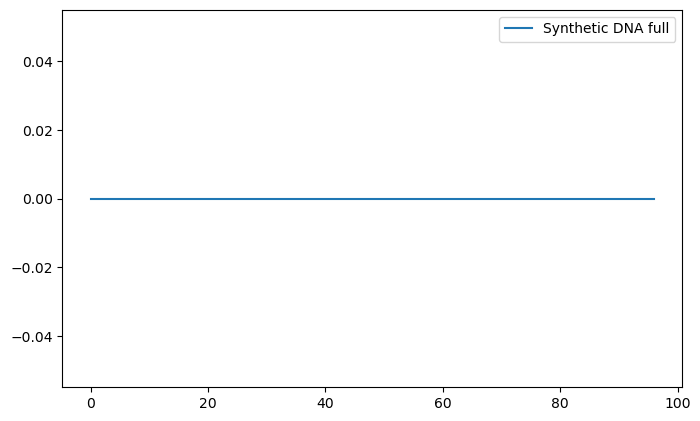

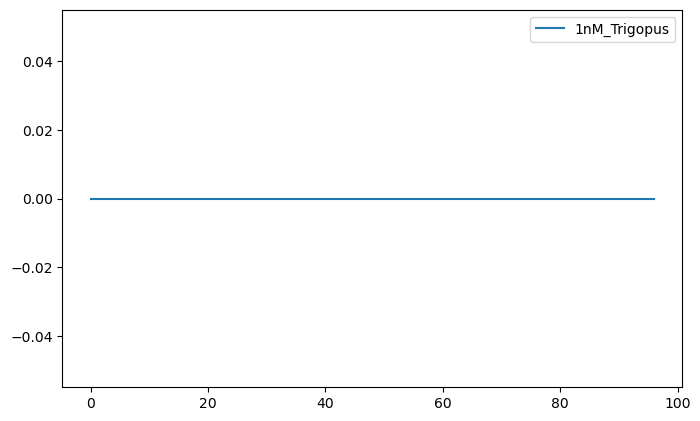

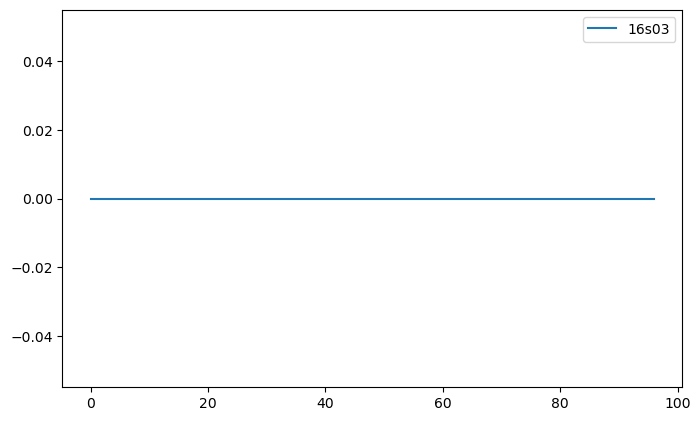

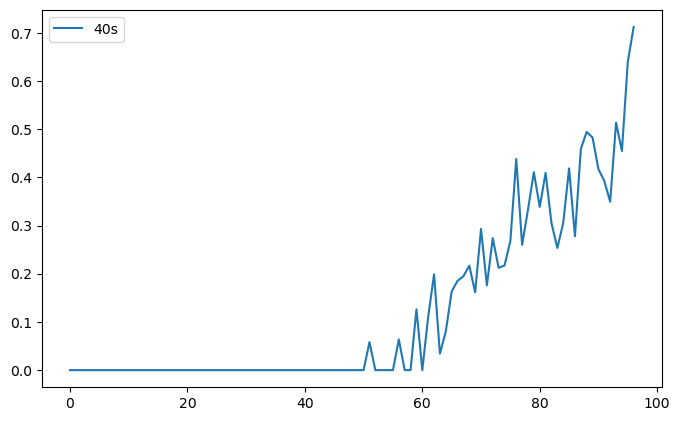

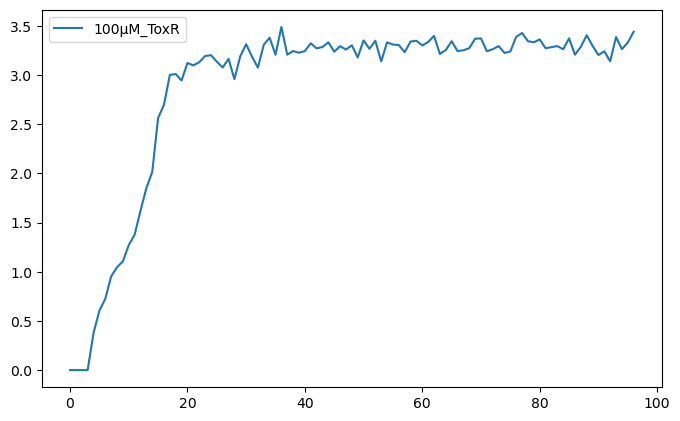

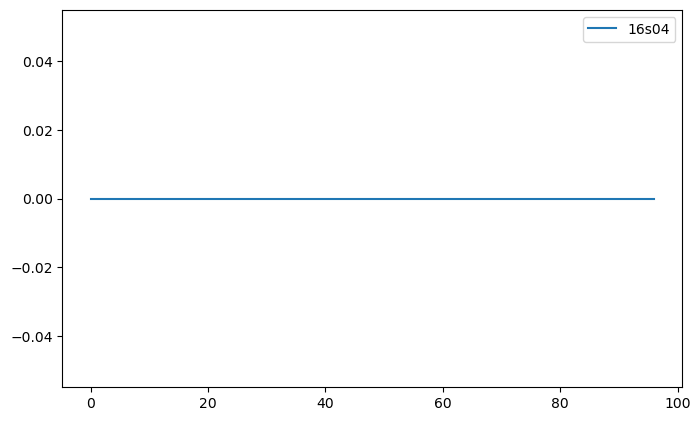

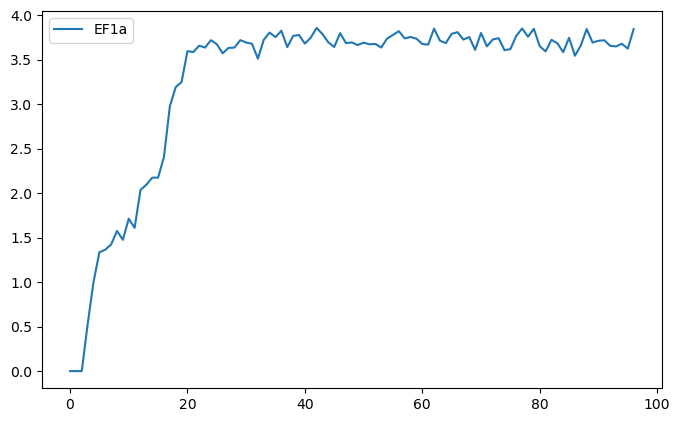

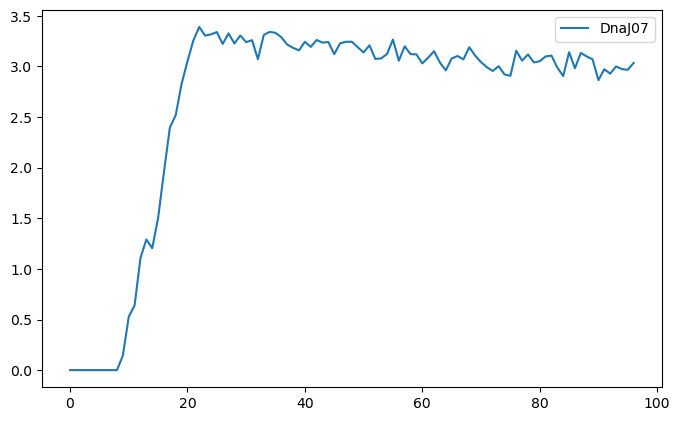

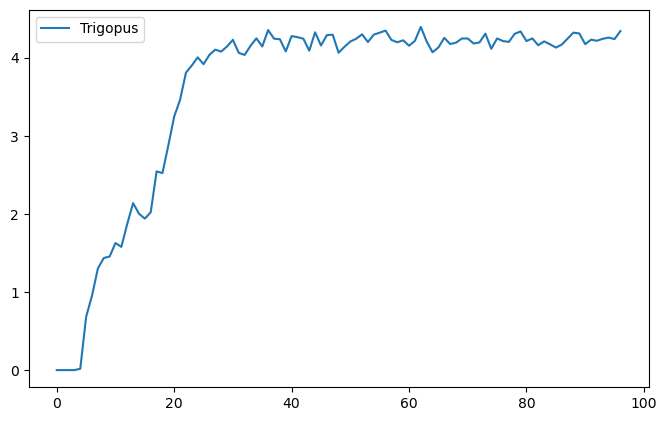

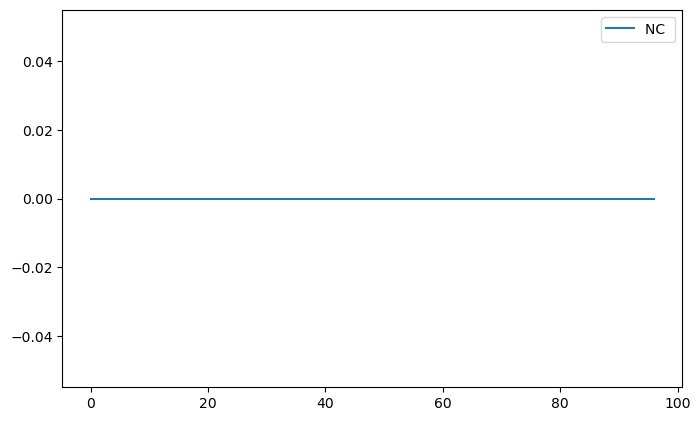

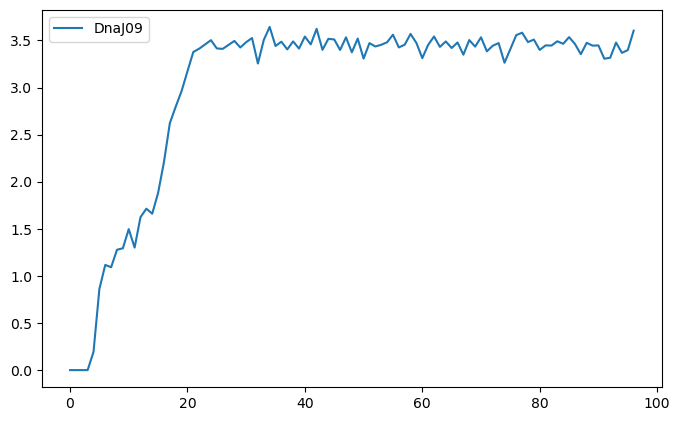

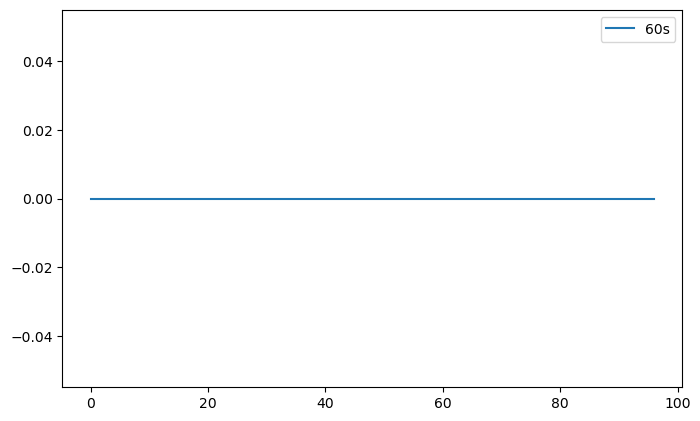

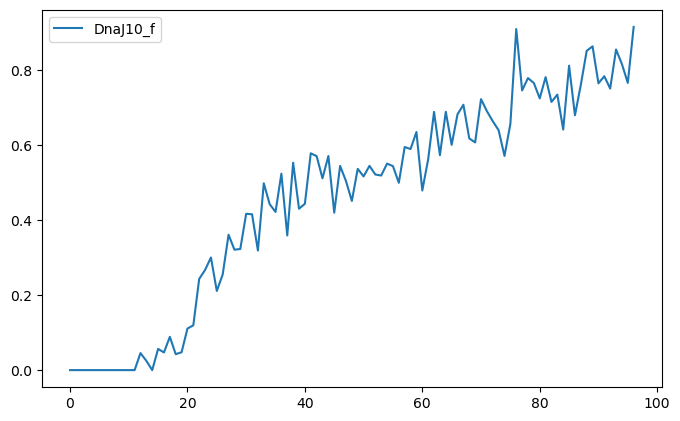

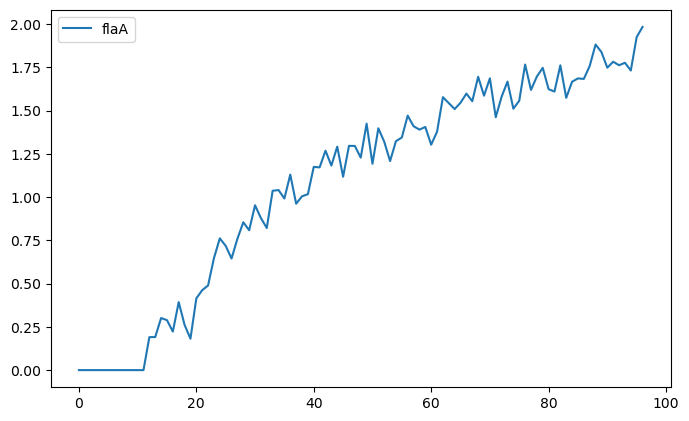

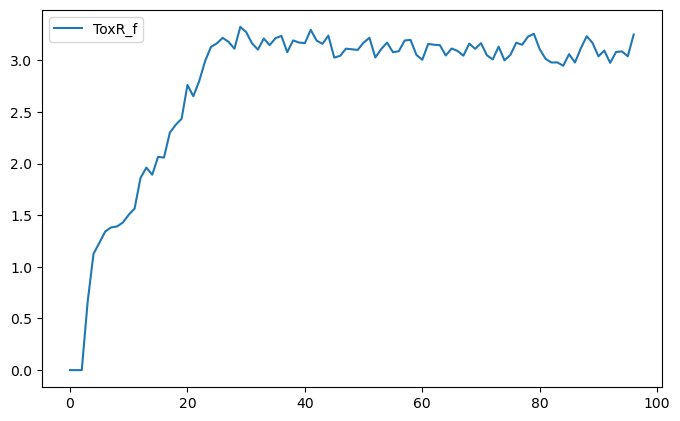

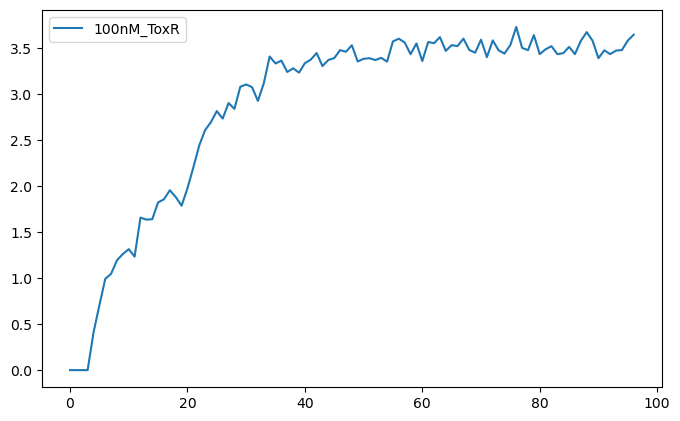

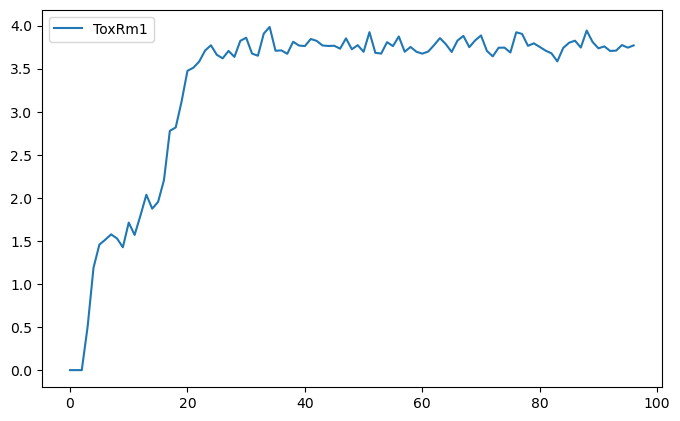

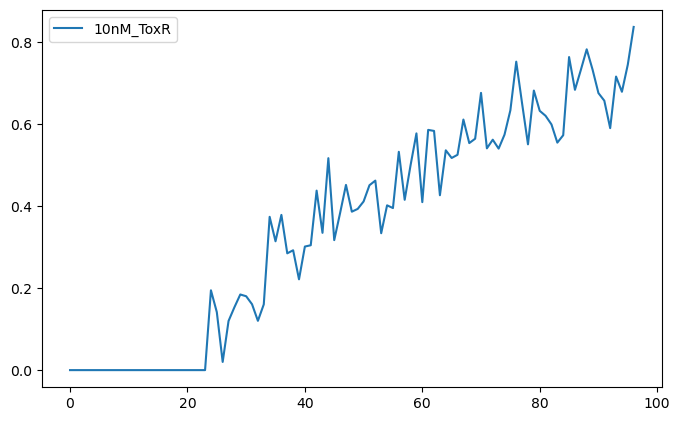

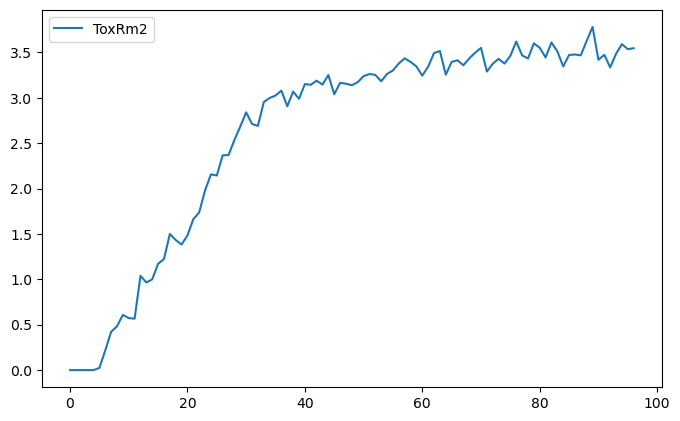

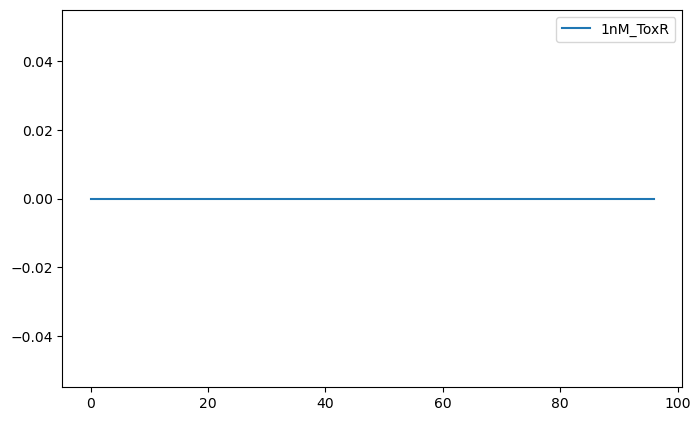

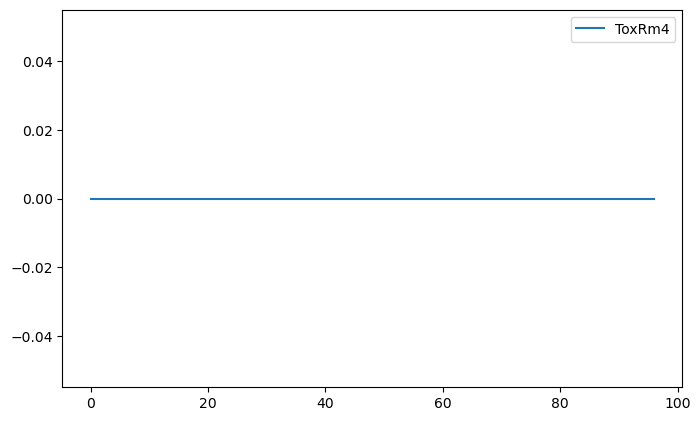

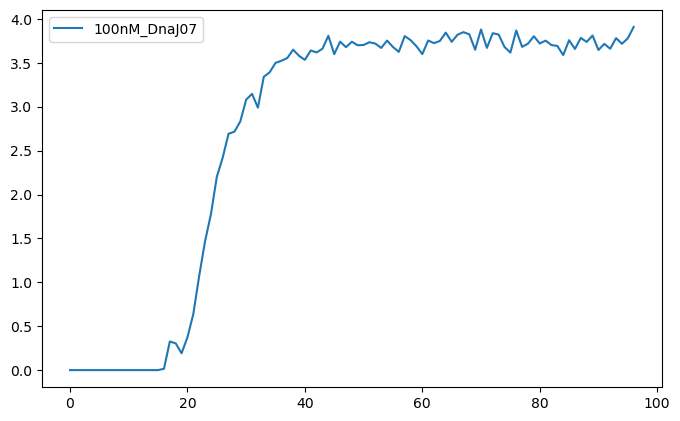

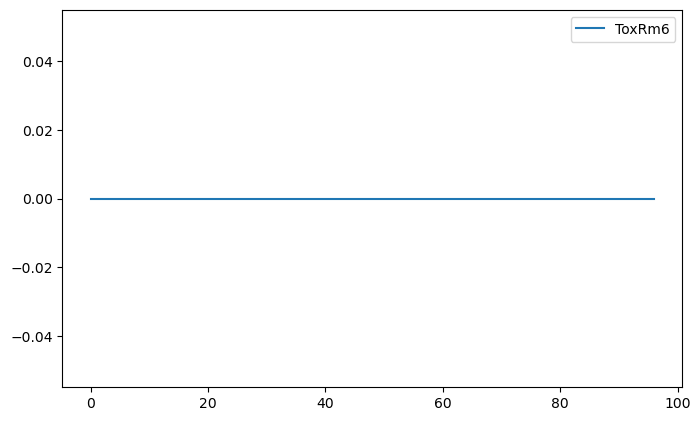

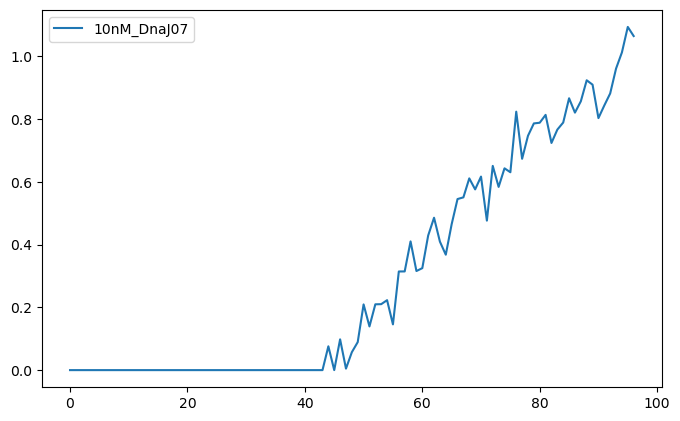

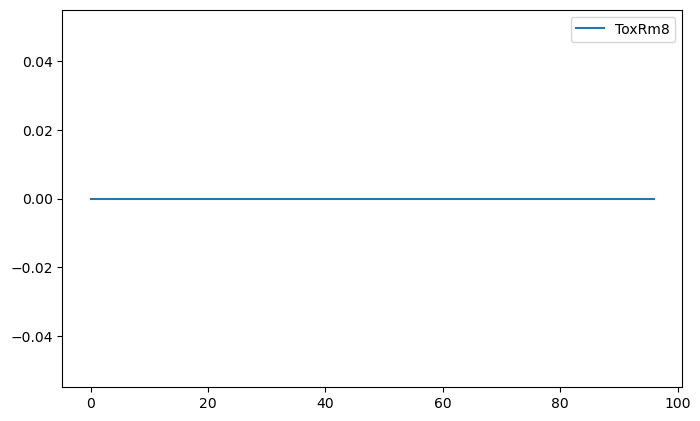

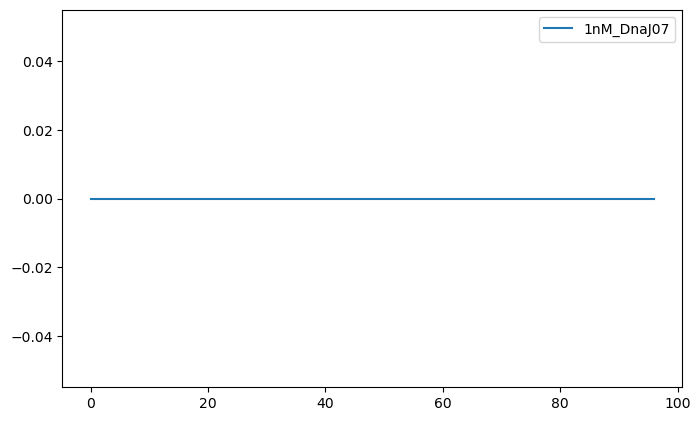

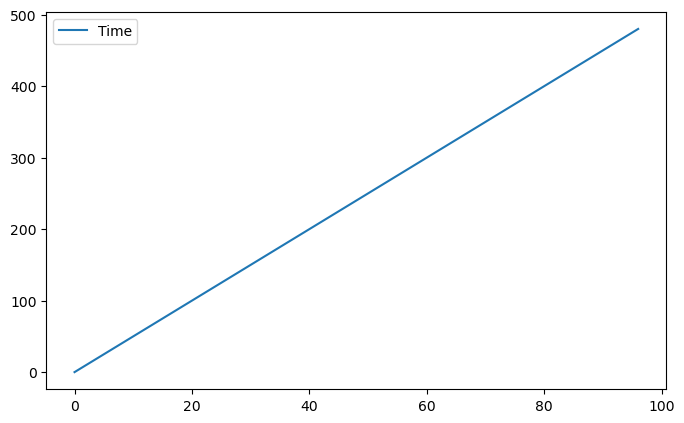

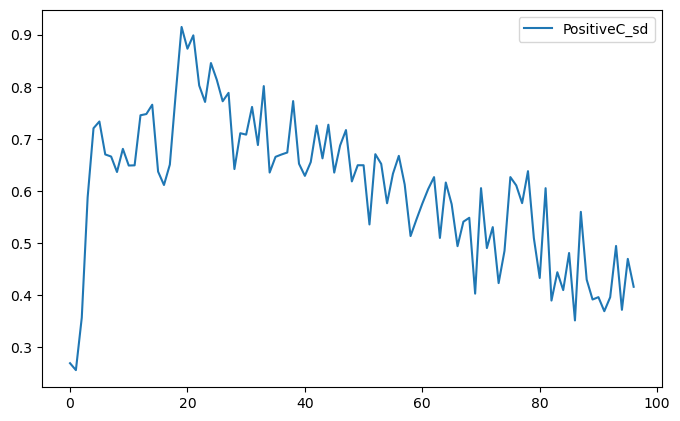

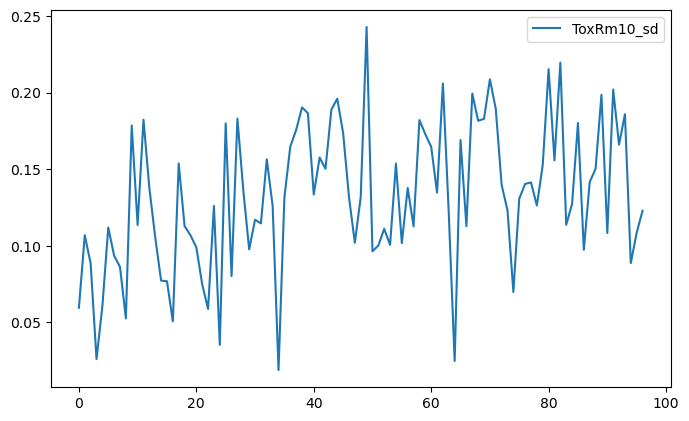

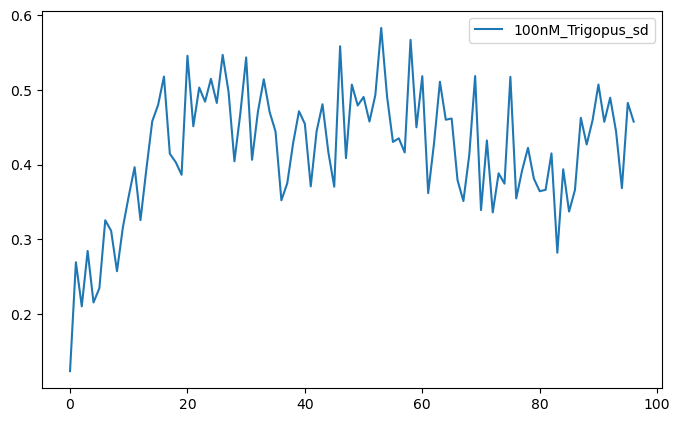

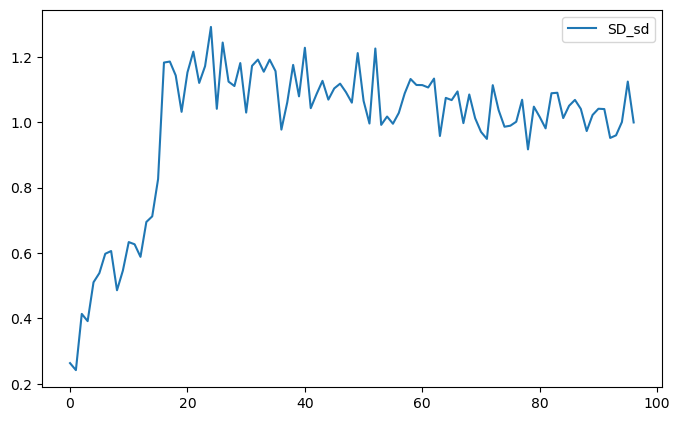

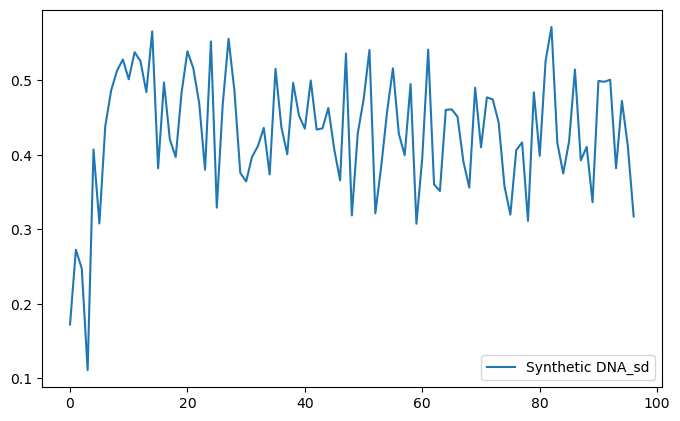

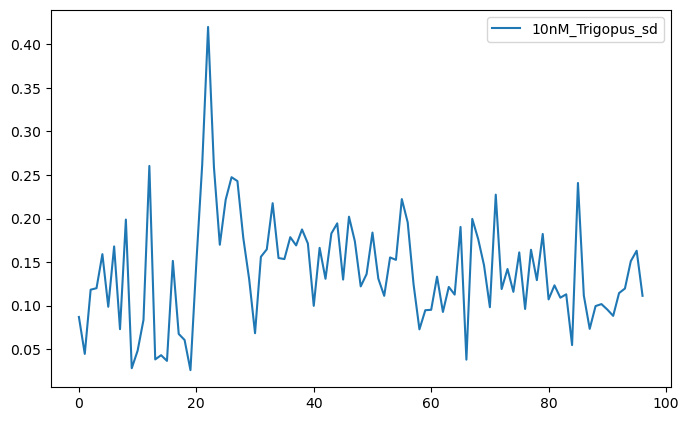

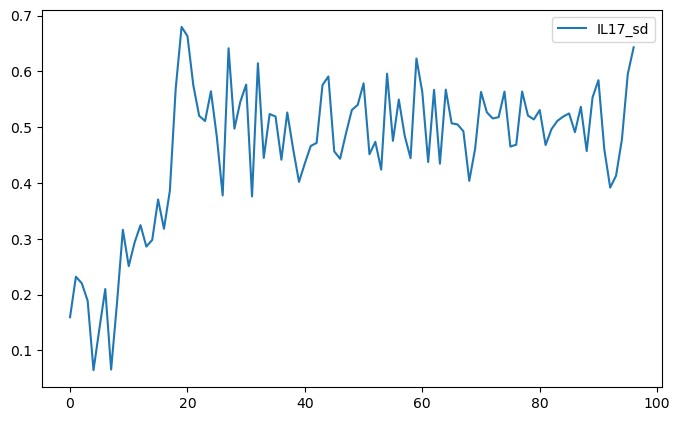

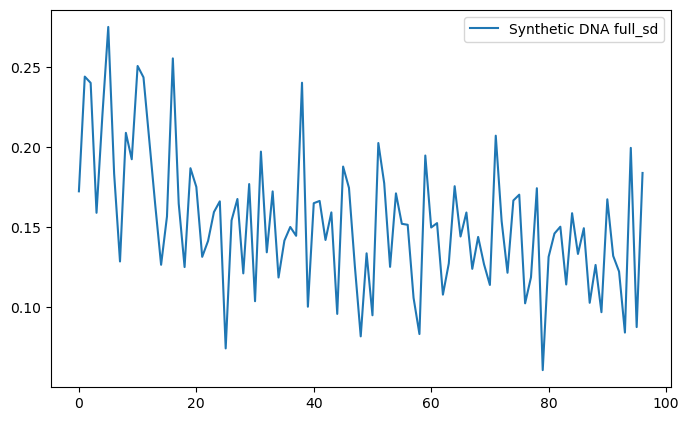

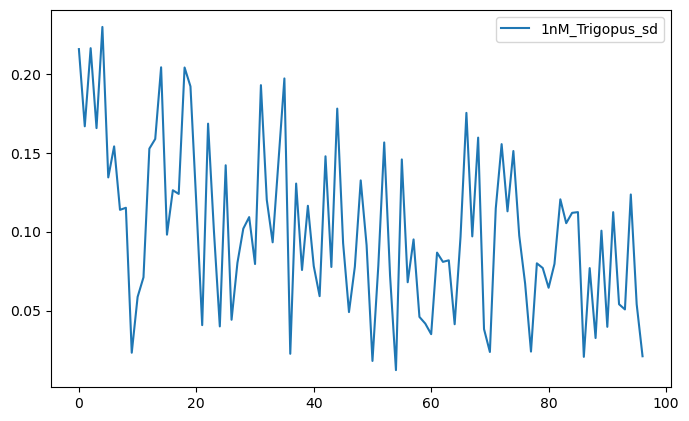

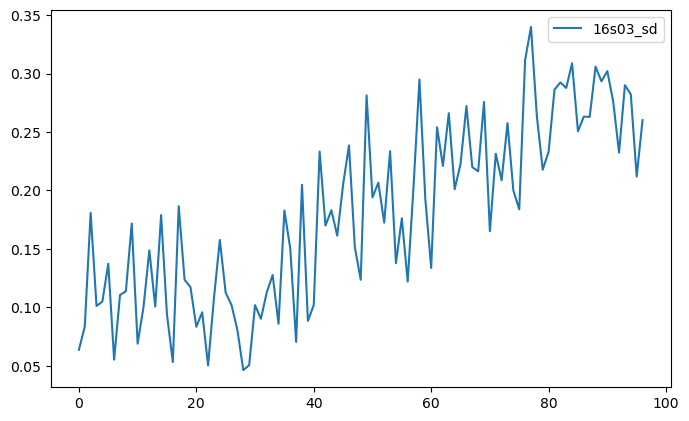

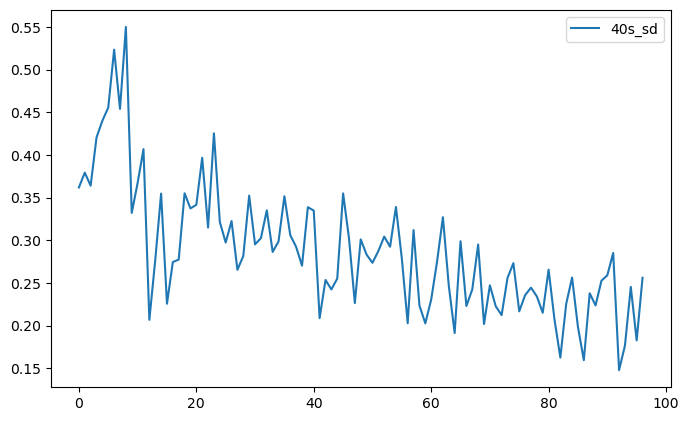

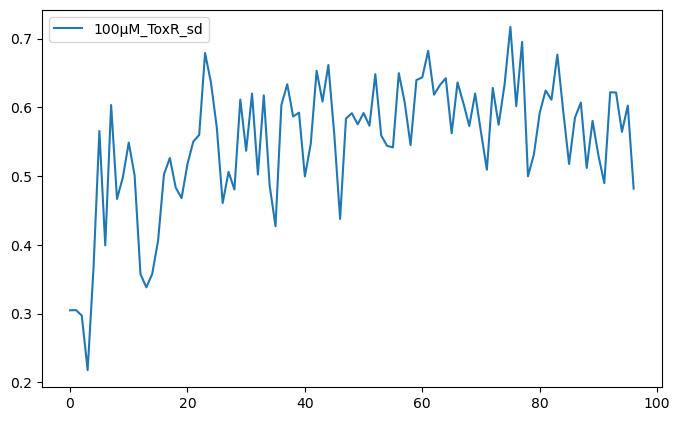

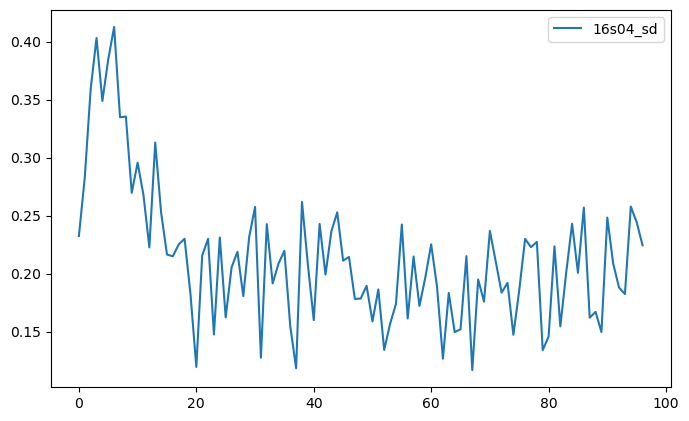

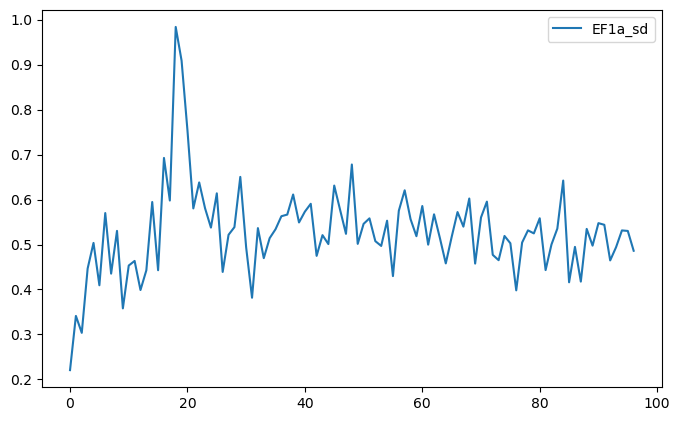

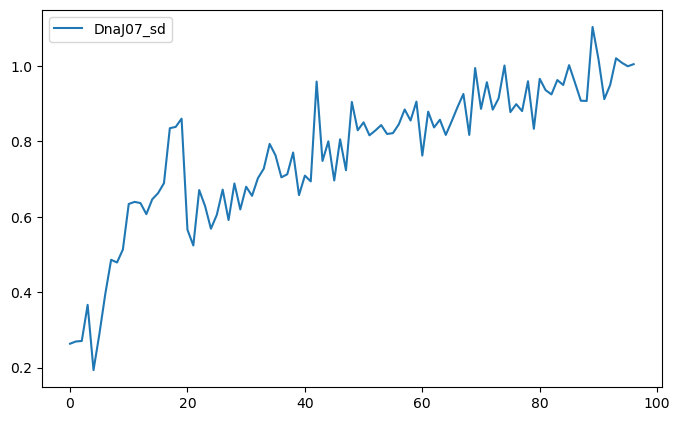

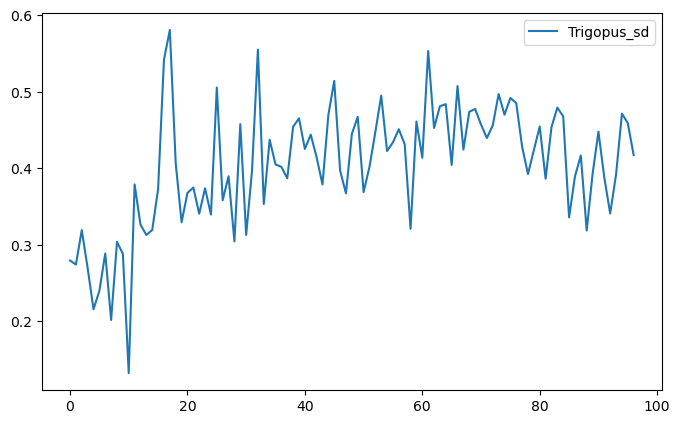

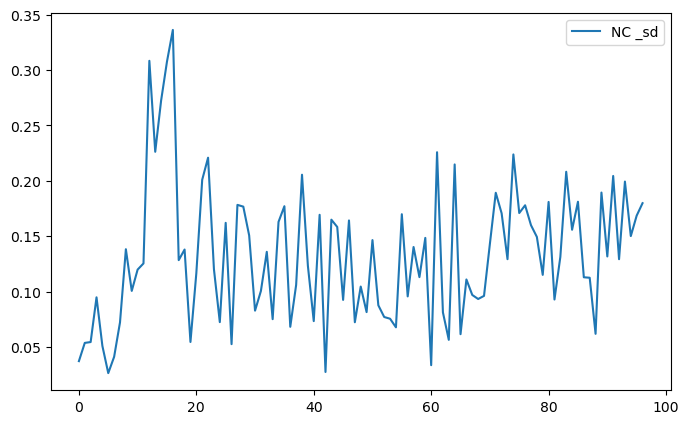

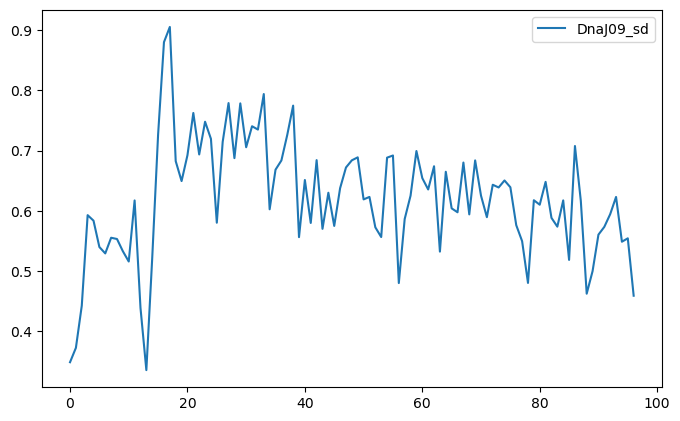

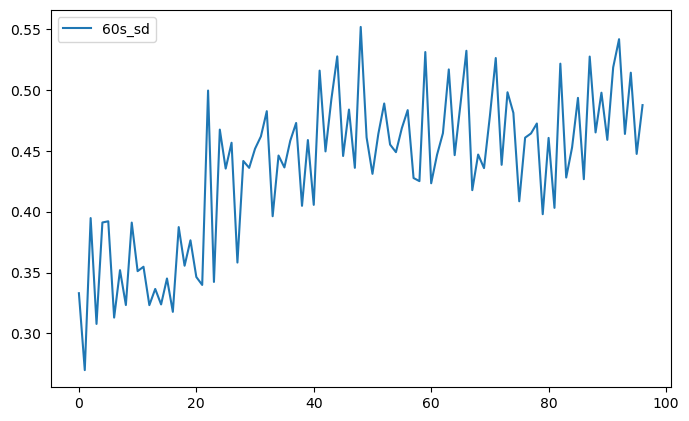

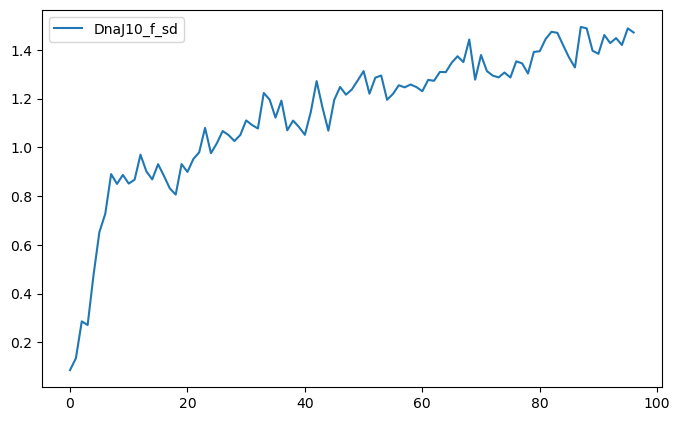

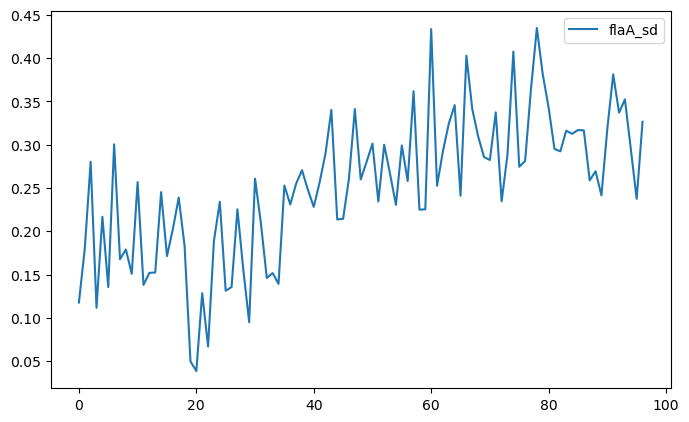

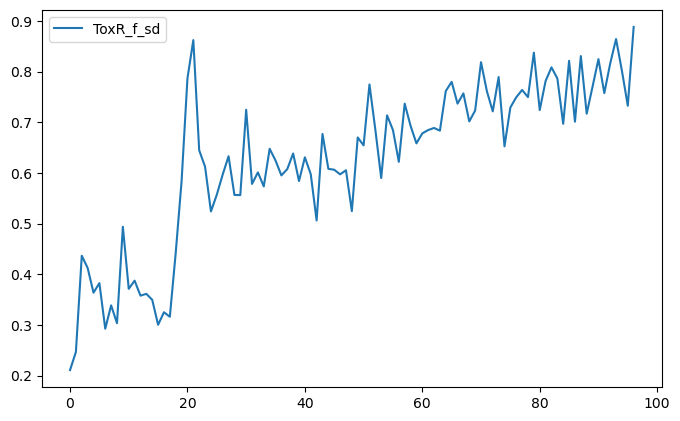

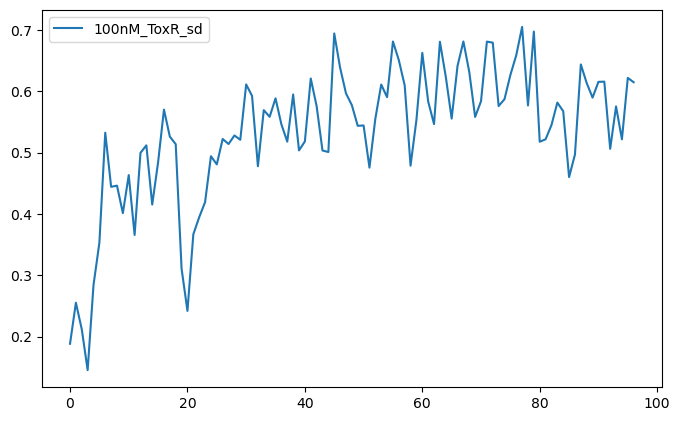

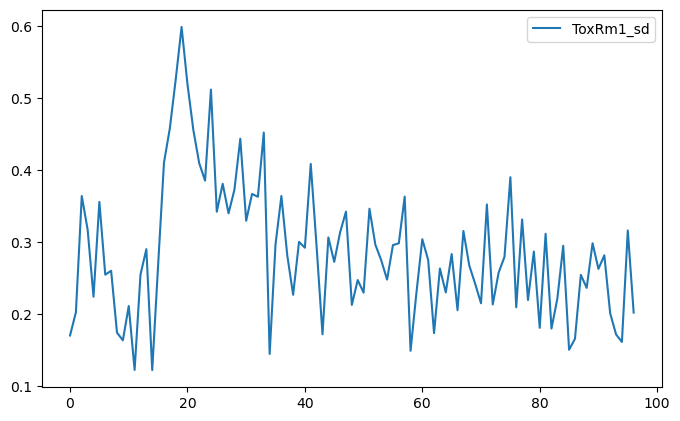

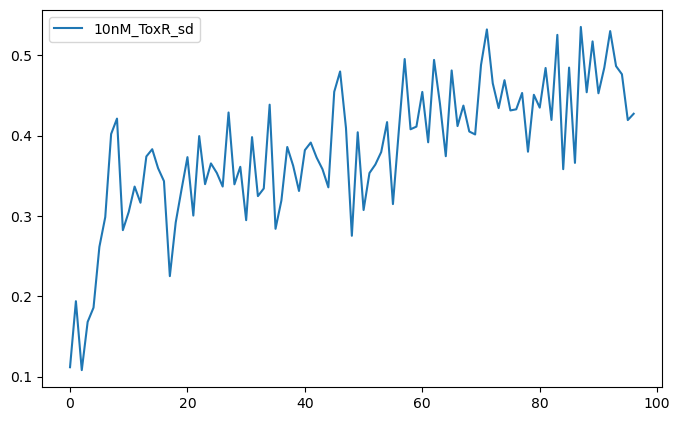

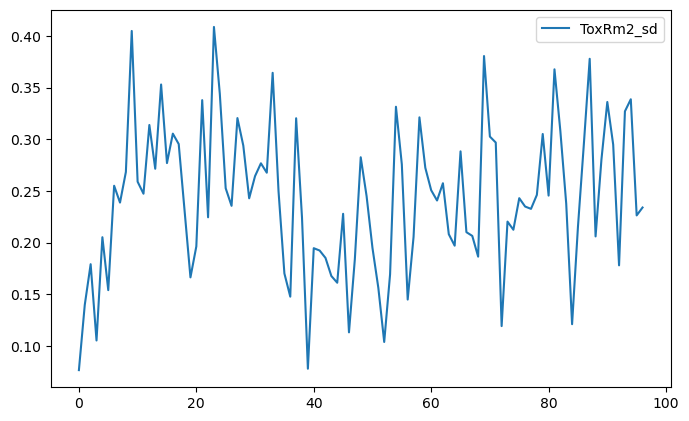

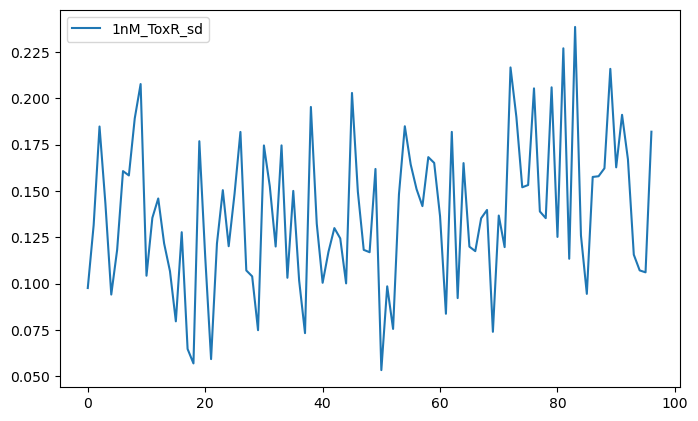

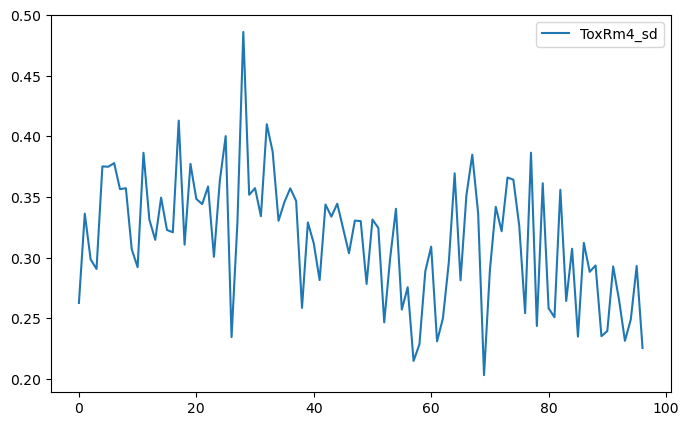

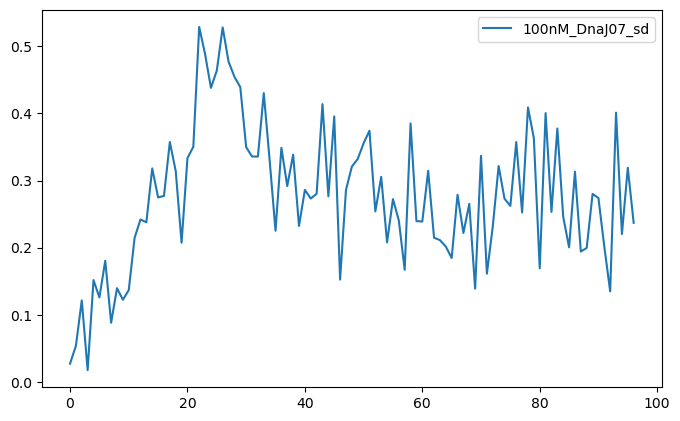

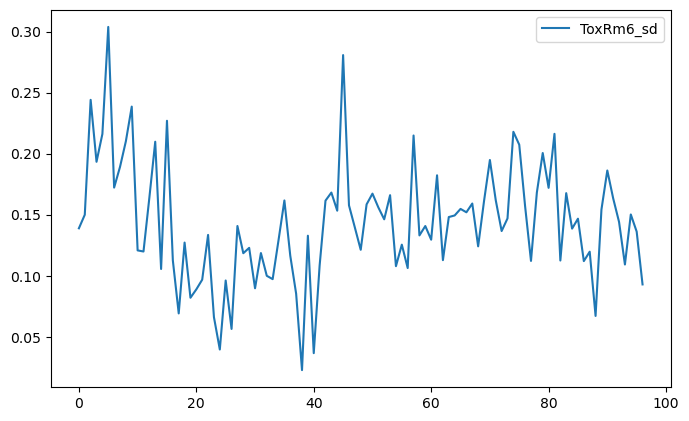

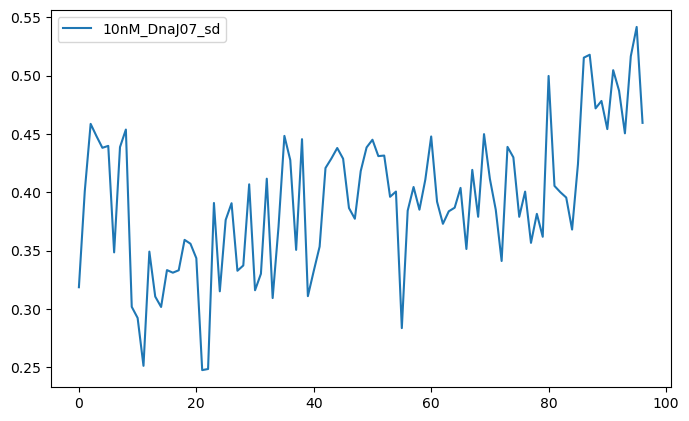

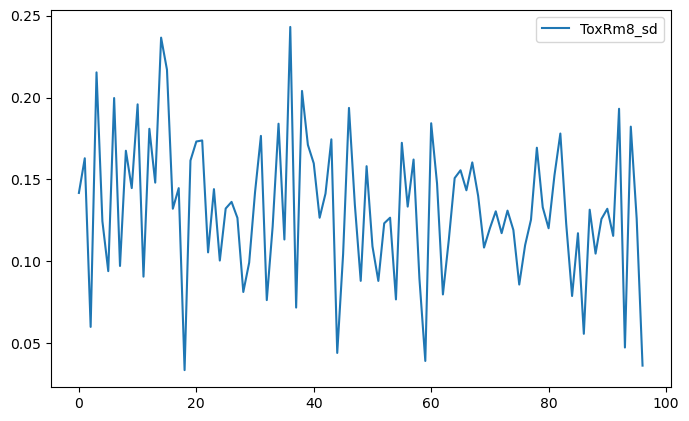

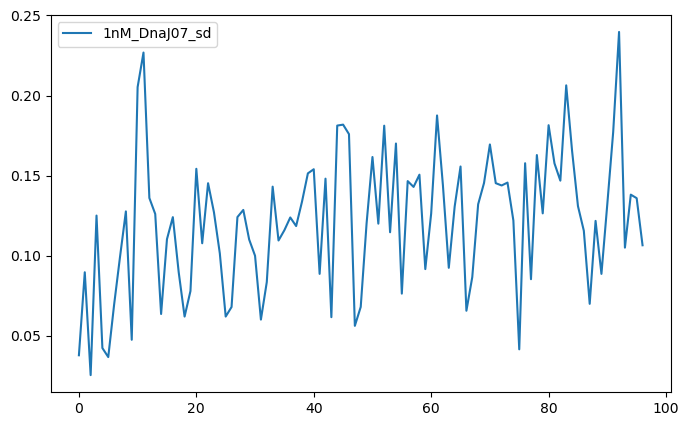

In [50]:
for i in targets.columns:
    targets[i].plot(label=i)
    plt.legend()
    plt.show()

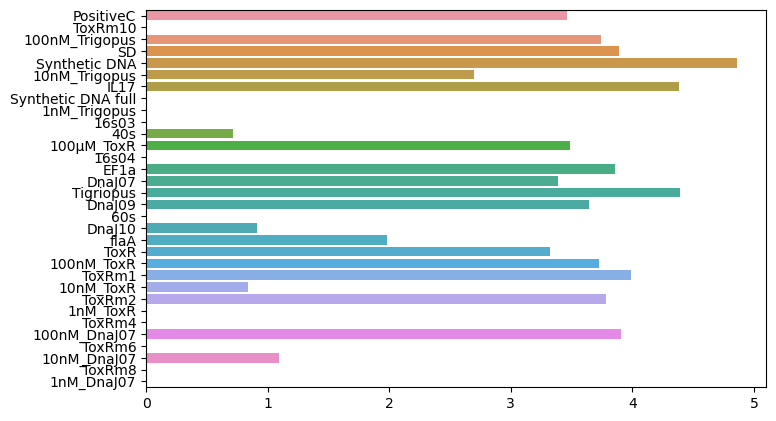

In [7]:
targ = targets.copy(deep = True)

targ.drop(sd,axis=1,inplace=True)
targ.drop('Time',axis=1,inplace=True)

df = endpoint(targ)
sns.barplot(data=df, orient = 'h')
#plt.savefig(path+'all_seq.png',dpi=300)
plt.show()

## Find conditions that did not work

In [8]:
df_0 = df[df ==0]
df_0 = df_0.dropna(axis=1)

list(df_0.columns)

['ToxRm10',
 'Synthetic DNA full',
 '1nM_Trigopus',
 '16s03',
 '16s04',
 '60s',
 '1nM_ToxR',
 'ToxRm4',
 'ToxRm6',
 'ToxRm8',
 '1nM_DnaJ07']

## Make a dataframe with only positive targets

In [9]:
pos_targ = targets.copy(deep=True)

pos_targ.drop(df_0,axis=1,inplace=True)

pos_targ.drop(sd,axis=1,inplace=True)

pos_targ.drop('Time',axis=1,inplace=True)


pos_targ.head()

,PositiveC,100nM_Trigopus,SD,Synthetic DNA,10nM_Trigopus,IL17,40s,100µM_ToxR,EF1a,DnaJ07,...,DnaJ09,DnaJ10,flaA,ToxR,100nM_ToxR,ToxRm1,10nM_ToxR,ToxRm2,100nM_DnaJ07,10nM_DnaJ07
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.090476,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,1.211587,0.000000,0.0,0.0,0.0,0.000000,0.526190,0.0,...,0.000000,0.0,0.0,0.660476,0.000000,0.506190,0.0,0.0,0.0,0.0
4,0.0,0.0,1.891746,0.507302,0.0,0.0,0.0,0.376825,1.000635,0.0,...,0.193651,0.0,0.0,1.126190,0.407937,1.189048,0.0,0.0,0.0,0.0


In [10]:
n = [x for x in pos_targ.columns if 'nM' not in x and 'µM' not in x and 'ToxRm' not in x 
     and 'DnaJ10' not in x and 'PositiveC' not in x and '40s' not in x]
print(n)

['SD', 'Synthetic DNA', 'IL17', 'EF1a', 'DnaJ07', 'Tigriopus', 'NC ', 'DnaJ09', 'flaA', 'ToxR']


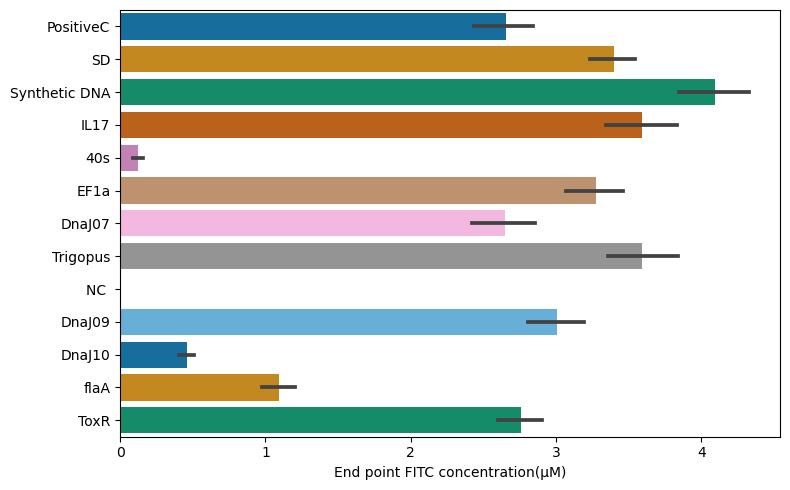

In [11]:
sns.barplot(data=pos_targ[n], orient = 'h',palette='colorblind')
plt.xlabel("End point FITC concentration(µM)")
plt.tight_layout()
plt.savefig(path+"all_pos_seq_clearer.png",dpi=300)

## Making a dataframe for presentation figure

In [124]:
targets.iloc[-1]['DnaJ10']

0.9150793650793654

In [11]:
targsd = targets.copy(deep = True)

m = [x for x in targsd.columns if 'nM' not in x and 'µM' not in x and 'ToxRm' not in x and 'sd' in x and 'DnaJ10' not in x
    and '40s' not in x]


targsd = targsd[m]


dfsd = pd.DataFrame(targsd.iloc[-1]).T

dfsd.drop(['16s03_sd','16s04_sd','60s_sd','Synthetic DNA full_sd','NC _sd','PositiveC_sd'],axis=1,inplace=True)

dfsd



#targets[m]

,SD_sd,Synthetic DNA_sd,IL17_sd,EF1a_sd,DnaJ07_sd,Tigriopus_sd,DnaJ09_sd,flaA_sd,ToxR_sd
96,0.99936,0.317384,0.643123,0.486105,1.00471,0.417095,0.458893,0.32658,0.888029


               End_Point        sd            Organism
Synthetic DNA   4.856825  0.317384  Synthetic sequence
Tigriopus       4.394127  0.417095           Tigriopus
IL17            4.379524  0.643123              Oyster
SD              3.892222  0.999360              Oyster
EF1a            3.858254  0.486105              Mussel


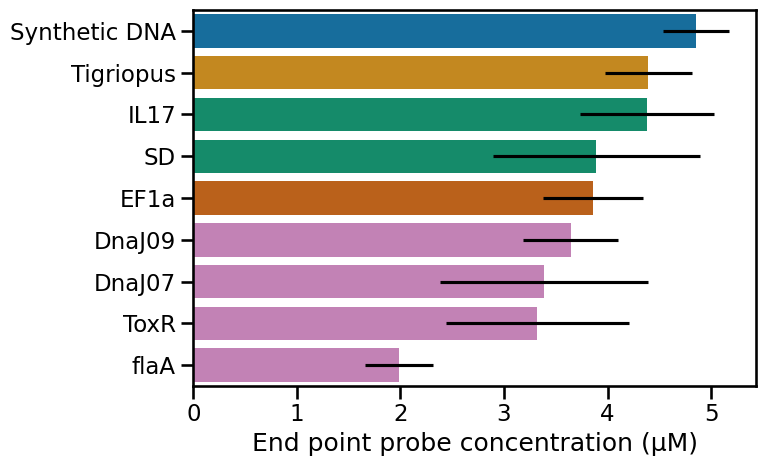

In [20]:
sns.set_context('talk')
fi = endpoint(pos_targ[n]).T

fi['sd'] = dfsd.iloc[0].values

fi['Organism'] = ['Oyster','Synthetic sequence','Oyster','Mussel',
              'V.aestuarianus','Tigriopus','V.aestuarianus',
            'V.aestuarianus','V.aestuarianus']

fi.rename(columns={0:'End_Point'},inplace=True)

fi.sort_values(by=['Organism'],inplace=True)

fi.sort_values(by=['End_Point'],inplace=True,ascending=False)

print(fi.head()) 

sns.barplot(x=fi.End_Point,y=fi.index, orient = 'h',palette='colorblind',hue=fi.Organism,dodge=False,xerr=fi.sd)
plt.xlabel('End point probe concentration (µM)')
#plt.legend(bbox_to_anchor=(0.9, 0.75),fancybox=True, shadow=True,title='Organism')
plt.tight_layout()
plt.legend('',frameon=False)
plt.savefig('../images/SHERLOCK/figure_all_targ.png',dpi=300)
plt.show()

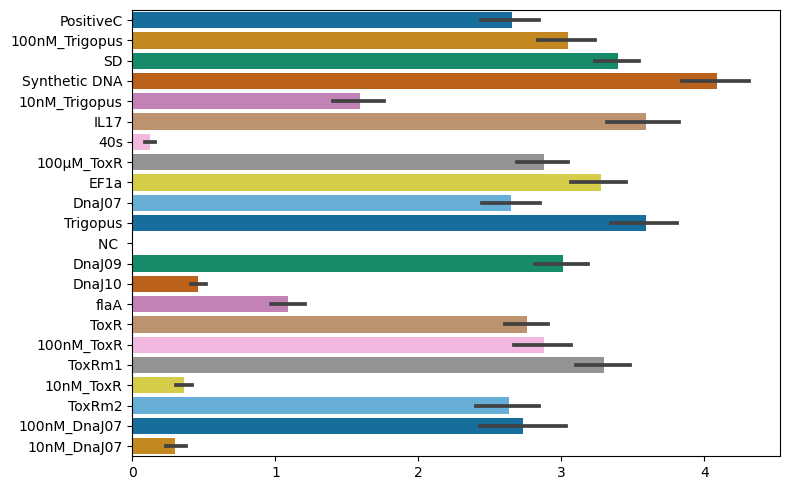

In [25]:
sns.barplot(data=pos_targ, orient = 'h',palette='colorblind')
plt.tight_layout()
#plt.savefig(path+"all_pos_seq.png",dpi=300)

## ToxR mutation

['ToxR', 'ToxRm1_sd', 'ToxRm2_sd', 'ToxRm4_sd', 'ToxRm6_sd', 'ToxRm8_sd', 'ToxRm10_sd']
['ToxR', 'ToxRm1', 'ToxRm2', 'ToxRm4', 'ToxRm6', 'ToxRm8', 'ToxRm10']


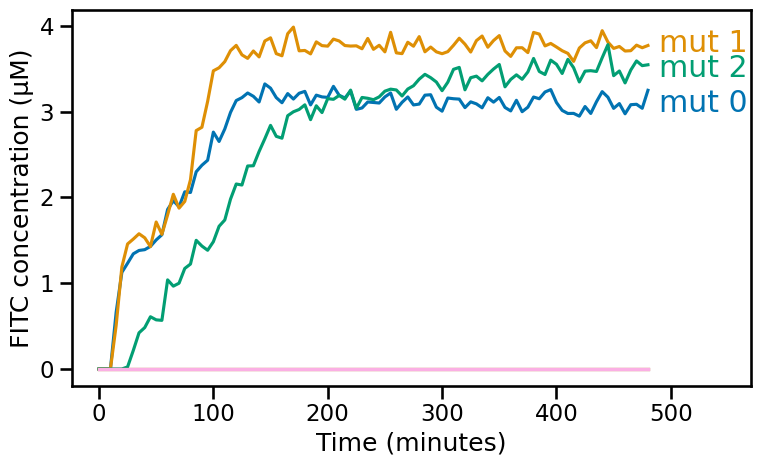

In [47]:
sns.set_context('talk')

tox = [x for x in targets if "ToxRm" in x and "ToxR" in x and "_sd" not in x]
tox.insert(0,'ToxR')
#print(tox)
#tox.pop()

sd_tox = [x for x in targets if "ToxR" in x and "ToxRm" in x and "_sd" in x ]
sd_tox.insert(0,'ToxR')
sd_tox = sorted(sd_tox,key=len)
print(sd_tox)
#sd_tox.pop(0)

counter = 0 

print(sorted(tox,key=len))

for i in sorted(tox,key=len):
    sns.lineplot(targets.Time,targets[i])
    #plt.errorbar(targets.Time,targets[i],yerr=targets[sd_tox[counter]],label=i)
    counter+=1 
    
plt.ylabel("FITC concentration (µM)")
plt.xlabel("Time (minutes)")

plt.text(490,3,'mut 0', color = sns.color_palette('colorblind')[0],fontsize='large')
plt.text(490,3.7,'mut 1', color = sns.color_palette('colorblind')[1],fontsize='large')
plt.text(490,3.4,'mut 2', color = sns.color_palette('colorblind')[2],fontsize='large')


#plt.legend(['ToxR','m1','m2','m4','m6','m8','m10'],bbox_to_anchor=(0.9, 0.4),shadow=True)
plt.xlim(-24.0, 570.0)
plt.tight_layout()
plt.savefig(path+'mutation.png',dpi=300)
plt.show()


## Dilutions

### ToxR

['100µM_ToxR', '100nM_ToxR', '10nM_ToxR', '1nM_ToxR']
['100µM_ToxR_sd', '100nM_ToxR_sd', '10nM_ToxR_sd', '1nM_ToxR_sd']


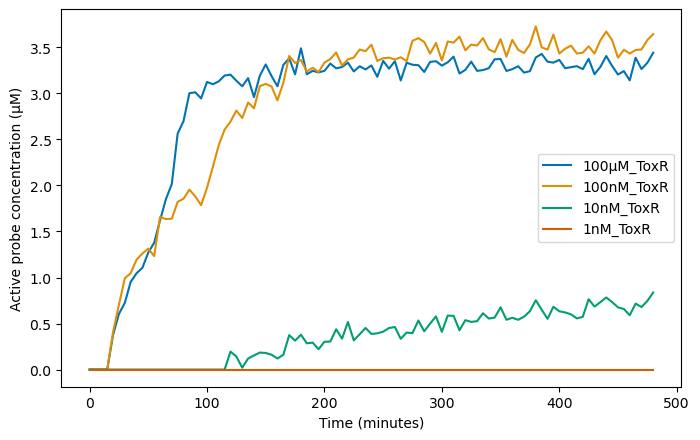

In [33]:
tox = [x for x in targets if "ToxR" in x and "ToxRm" not in x and "_sd" not in x and 'ToxR_f' not in x]
print(tox)

sd_tox = [x for x in targets if "ToxR" in x and "ToxRm" not in x and "sd" in x and 'ToxR_f' not in x ]
print(sd_tox)

counter = 0 

for i in tox:
    sns.lineplot(targets.Time,targets[i],label=i)
    #plt.errorbar(targets.Time,targets[i],yerr=targets[sd_tox[counter]],label=i)
    counter+=1 
    
plt.ylabel("Active probe concentration (µM)")
plt.xlabel("Time (minutes)")
plt.legend()
#plt.savefig(path+'toxR_dilution.png',dpi=300)
plt.show()

### DNAJ

['DnaJ07', '100nM_DnaJ07', '10nM_DnaJ07', '1nM_DnaJ07']
['DnaJ07_sd', '100nM_DnaJ07_sd', '10nM_DnaJ07_sd', '1nM_DnaJ07_sd']


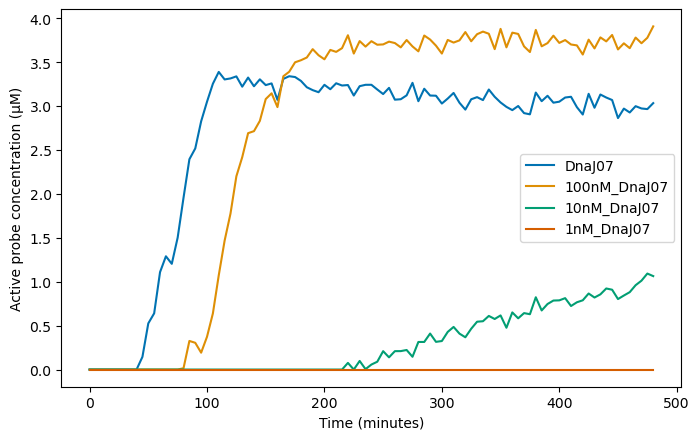

In [36]:
dnaj = [x for x in targets if "DnaJ07" in x  and "_sd" not in x ]
print(dnaj)

sd_dnaj = [x for x in targets if "DnaJ07" in x  and "_sd" in x]
print(sd_dnaj)

counter = 0 

for i in dnaj:
    sns.lineplot(targets.Time,targets[i],label=i)
    #plt.errorbar(targets.Time,targets[i],yerr=targets[sd_dnaj[counter]],label=i)
    counter+=1 
    
plt.ylabel("Active probe concentration (µM)")
plt.xlabel("Time (minutes)")
plt.legend()
plt.savefig(path+'DnaJ_dilution.png',dpi=300)
plt.show()

### Trigriopus

['100nM_Trigopus', '10nM_Trigopus', '1nM_Trigopus', 'Trigopus']
['100nM_Trigopus_sd', '10nM_Trigopus_sd', '1nM_Trigopus_sd', 'Trigopus_sd']


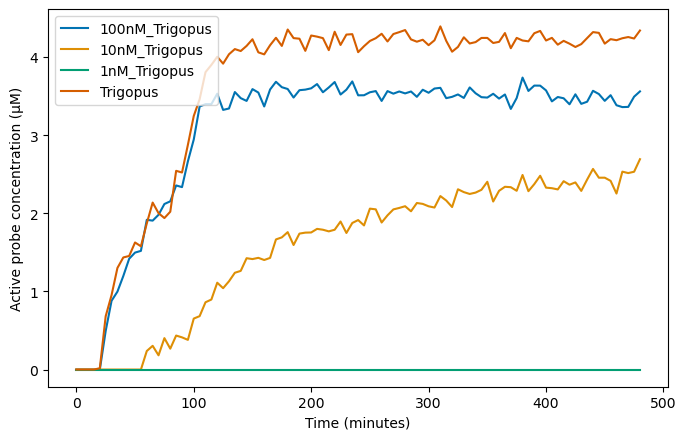

In [39]:
trigopus = [x for x in targets if "Trigopus" in x  and "_sd" not in x ]
print(trigopus)

sd_trigopus = [x for x in targets if "Trigopus" in x  and "_sd" in x]
print(sd_trigopus)

counter = 0 

for i in trigopus:
    sns.lineplot(targets.Time,targets[i],label=i)
    #plt.errorbar(targets.Time,targets[i],yerr=targets[sd_trigopus[counter]],label=i)
    counter+=1 
    
plt.ylabel("Active probe concentration (µM)")
plt.xlabel("Time (minutes)")
plt.legend()
plt.savefig(path+'trigopus_dilution.png',dpi=300)
plt.show()

## Look at individual curves

In [7]:
trip = px.excelreader('../results/SHERLOCK/all_targets/220920_sherlock.xlsx',70,"YES")

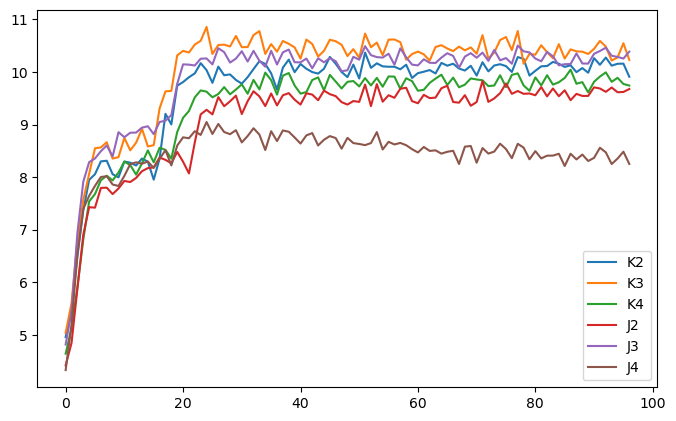

In [37]:
trip[['K2', 'K3', 'K4','J2', 'J3', 'J4']].plot()

#plt.title('ToxR')
plt.legend()
#plt.savefig(path+'ali_2.png',dpi=300)
plt.show()


## Export dataframe 

In [5]:
#pos_targ.to_csv('../results/SHERLOCK/all_targets/pos_targets.csv')

l = ["['J2', 'J3', 'J4']","['K2', 'K3', 'K4']","['L2', 'L3', 'L4']","['M2', 'M3', 'M4']",
     "['N2', 'N3', 'N4']","['O2', 'O3', 'O4']","['B5', 'B6', 'B7']"]
targets[l].plot()
plt.legend(["ToxR","ToxRm1","ToxRm2","ToxRm4","ToxRm6","ToxRm8","ToxRm10"],loc="right")
plt.savefig('../images/SHERLOCK/mutation.png')
plt.show()

targets["['C5', 'C6', 'C7']"].plot()
plt.legend(["Synthetic sequence"])
plt.savefig("../images/SHERLOCK/synthetic_seq.png")
plt.show()

targets[["['J5', 'J6', 'J7']","['K5', 'K6', 'K7']","['L5', 'L6', 'L7']"]].plot()
plt.legend(["ToxR 100nM","ToxR 10nM","ToxR 1nM"])
plt.savefig(path+'ToxR_dilution.png')
plt.show()

targets["['E8', 'E9', 'E10']"].plot()
plt.legend(["ToxR 100µM"])
plt.savefig(path+'ToxR_100µ.png')
plt.show()

targets[["['M5', 'M6', 'M7']","['N5', 'N6', 'N7']","['O5', 'O6', 'O7']"]].plot()
plt.legend(["DnaJ07 100nM","DnaJ07 10nM","DnaJ07 1nM"])
plt.savefig(path+'DnaJ07_dilution.png')
plt.show()

targets[["['B8', 'B9', 'B10']","['C8', 'C9', 'C10']","['D8', 'D9', 'D10']"]].plot()
plt.legend(["Trigopus 100nM","Trigopus 10nM","Trigopus 1nM"],loc="lower right")
plt.savefig(path+'Trigopus_dilution.png')
plt.show()

test.rename(columns={"['F3', 'G3', 'H3']": '2µM_P_Cold',
                   "['F4', 'G4', 'H4']": '2µM_P',
                     "['F5', 'G5', 'H5']":'1µM_P' ,
                     "['F6', 'G6', 'H6']": '0.1µM_P',
                    "['F7', 'G7', 'H7']": 'NC_wt_cas',
                     0: '2µM_P_Cold_std',
                   1: '2µM_P_std',
                     2:'1µM_P_std' ,
                     3: '0.1µM_P_std',
                    4: 'NC_wt_cas_std'},
          inplace=True, errors='raise')

test.head()

test[['2µM_P','1µM_P']].plot(yerr=[test['2µM_P_std'],test['1µM_P_std']])
plt.legend()
plt.ylabel("Fluorescence (A.U)")
plt.xlabel("Time Points")
plt.tight_layout()
#plt.savefig("images/SHERLOCK/probe_dilution_pt2.png",dpi=300)
plt.show()